In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


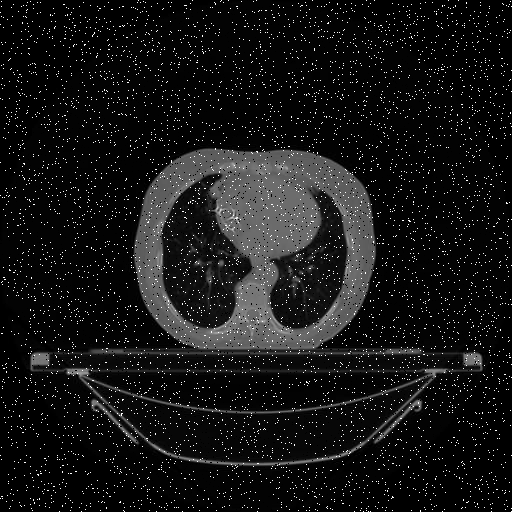

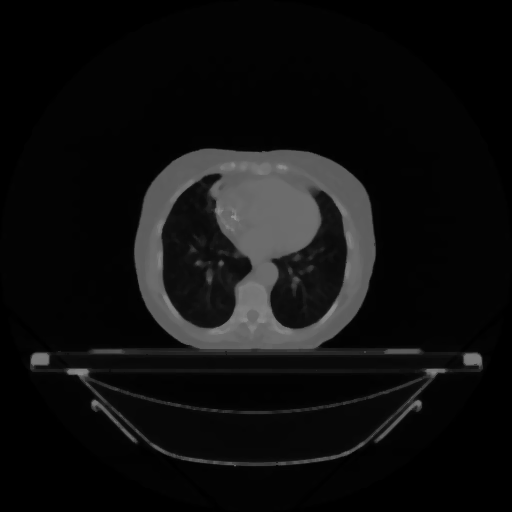

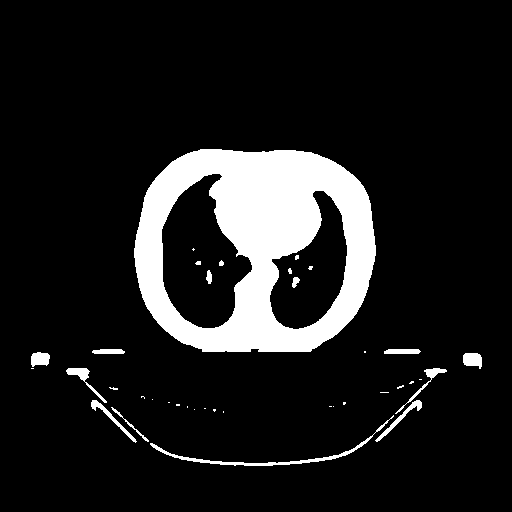

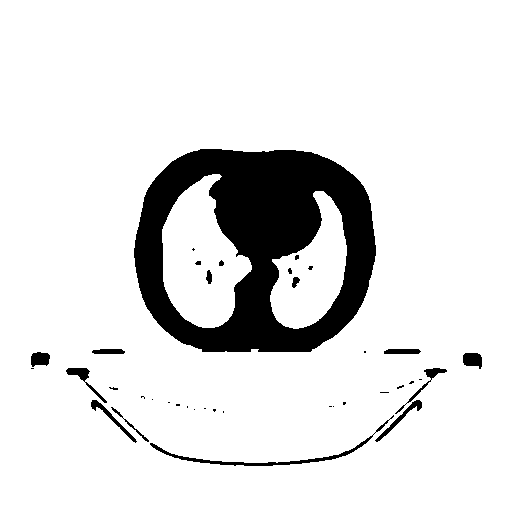

(512, 512)


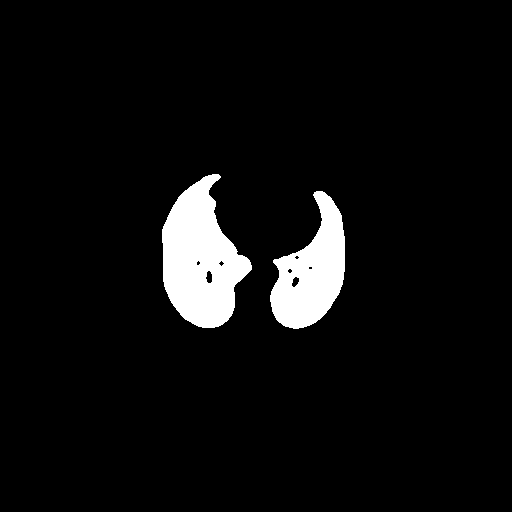

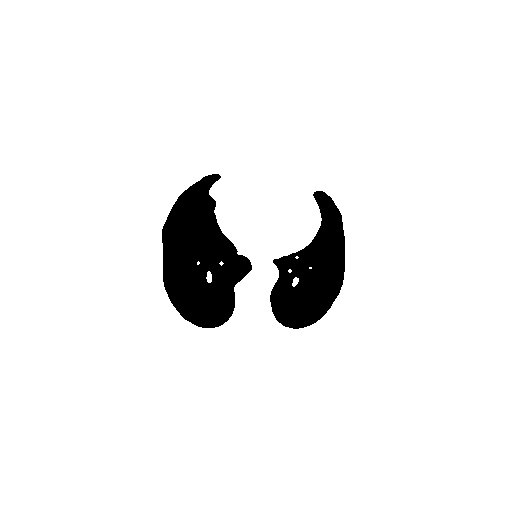

14484


In [ ]:
path = "/content/drive/MyDrive/tp01/Lung.bmp"

lung = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

cv2_imshow(lung)

lung_gaussian = cv2.medianBlur(lung, 5)

cv2_imshow(lung_gaussian)

lung_otsu = cv2.threshold(lung_gaussian, 0, 255, cv2.THRESH_OTSU)[1]

cv2_imshow(lung_otsu)

lung_inverted = 255 - lung_otsu

cv2_imshow(lung_inverted)

print(lung_inverted.shape)

lung_cropped = lung_inverted
lines = lung_inverted.shape[0]
columns = lung_inverted.shape[1]

for line in range(lines):
  for column in range(columns):

    if not(170 < line < 330) or not(160 < column < 345):
      lung_cropped[line, column] = 0
    else:
      continue

lung_cropped = cv2.medianBlur(lung_cropped, 5)
cv2_imshow(lung_cropped)

lines = lung_cropped.shape[0]
columns = lung_cropped.shape[1]
lung_cropped_inverted = lung_cropped

for line in range(lines):
  for column in range(columns):
    lung_cropped_inverted = 255 - lung_cropped

cv2_imshow(lung_cropped_inverted)

lines = lung_cropped_inverted.shape[0]
columns = lung_cropped_inverted.shape[1]
num_blacks = 0

for line in range(lines):
  for column in range(columns):
    if lung_cropped_inverted[line, column] == 0:
      num_blacks = num_blacks + 1

print(num_blacks)

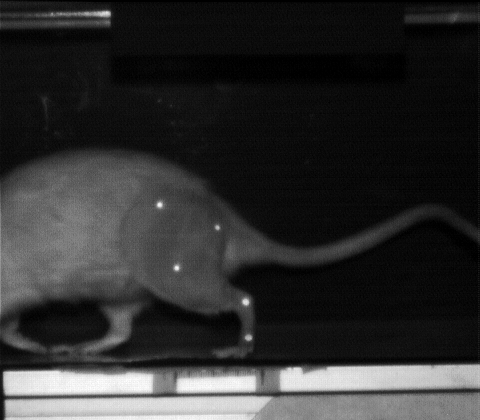

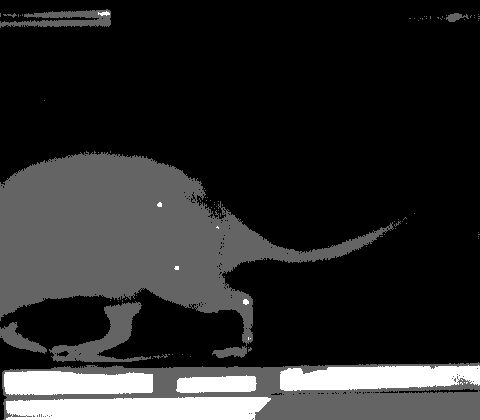

(420, 480)


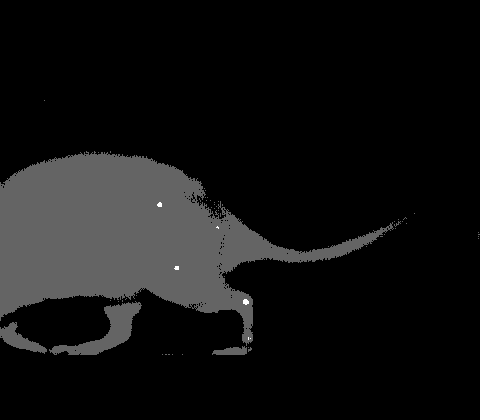

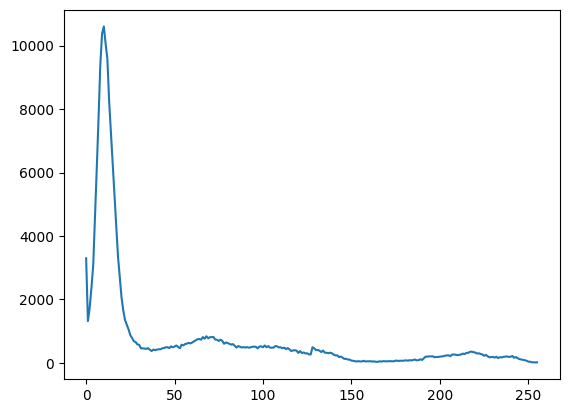

In [ ]:
path1 = "/content/drive/MyDrive/tp01/Rat.bmp"

img = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)

cv2_imshow(img)

hist = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.plot(hist)

low_thresh = 50
high_thresh = 175

img_thresh = img
lines = img.shape[0]
columns = img.shape[1]

for line in range(lines):
  for column in range(columns):
    if img[line, column] < low_thresh:
      img_thresh[line, column] = 0
    elif img[line, column] < high_thresh and img[line, column] >= low_thresh:
      img_thresh[line, column] = 100
    else:
      img_thresh[line, column] = 255

cv2_imshow(img_thresh)
print(img_thresh.shape)

for line in range(lines):
  for column in range(columns):
    if not(50 < line < 355):
      img_thresh[line, column] = 0

cv2_imshow(img_thresh)




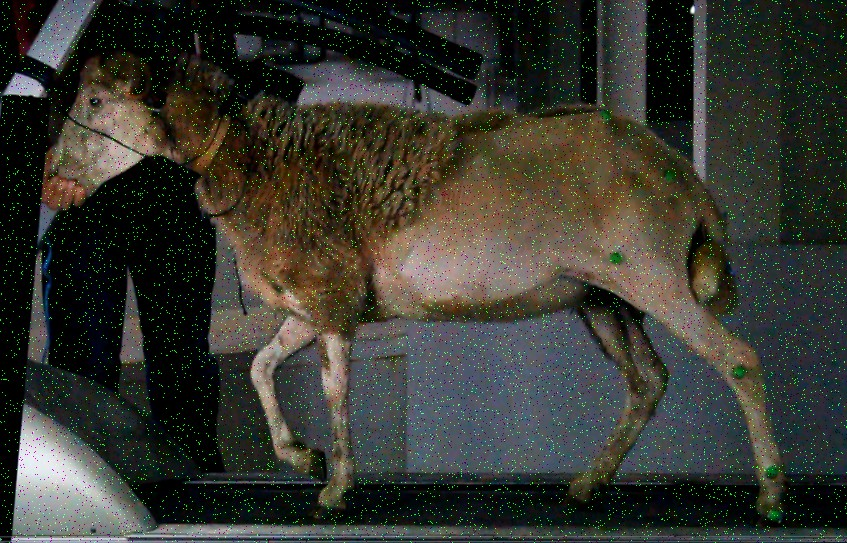

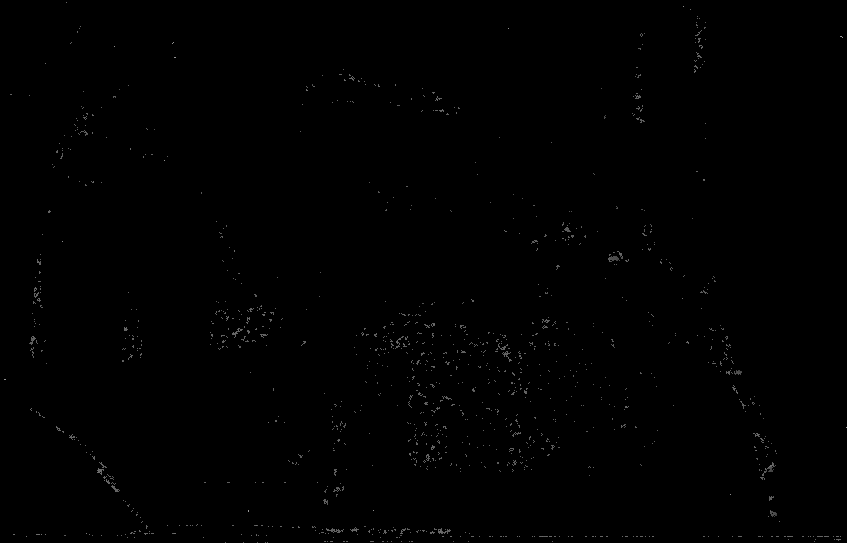

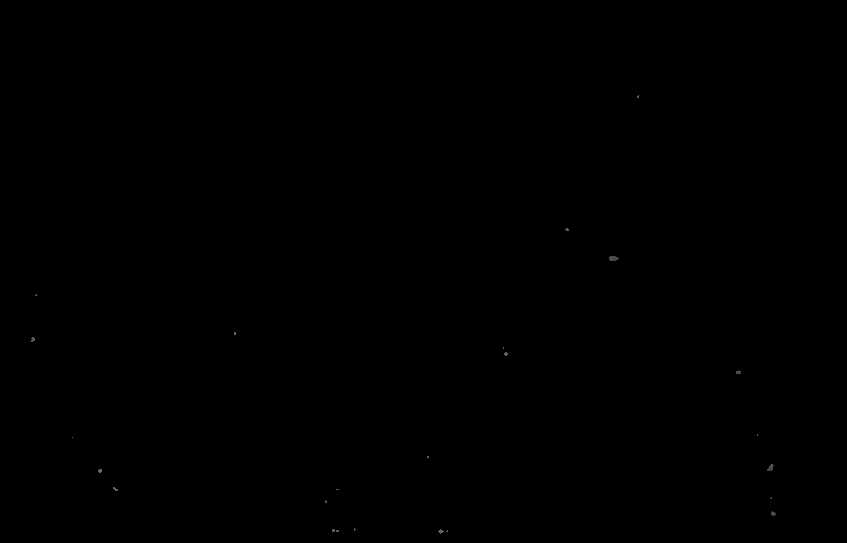

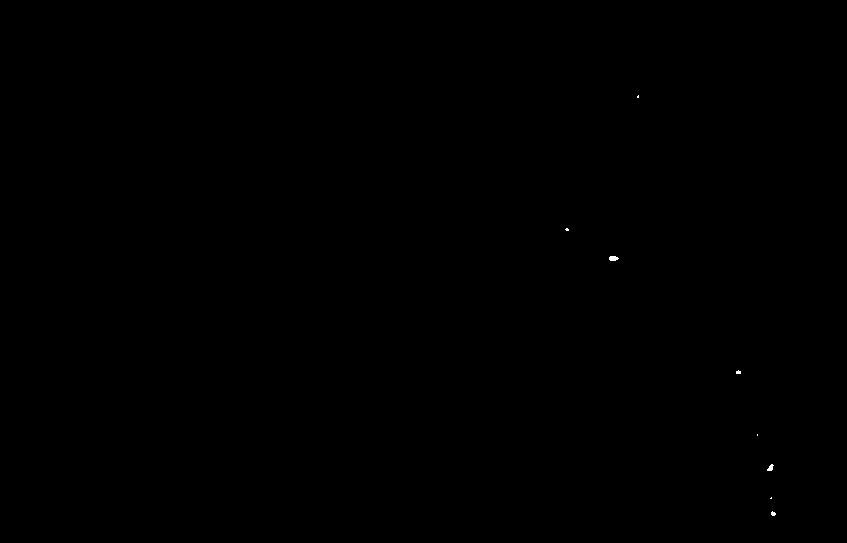

In [ ]:
path2 = "/content/drive/MyDrive/tp01/Sheep.jpg"

img = cv2.imread(path2, cv2.COLOR_BGR2RGB)

cv2_imshow(img)

lower_green = np.array([0, 100, 0], dtype = 'uint8')
upper_green = np.array([100, 255, 100], dtype = 'uint8')

mask = cv2.inRange(img, lower_green, upper_green)

img_green = cv2.bitwise_and(img, img, mask = mask)
img_green = cv2.cvtColor(img_green, cv2.COLOR_RGB2GRAY)

cv2_imshow(img_green)

img_blur = cv2.medianBlur(img_green, 5)

cv2_imshow(img_blur)

lines = img_blur.shape[0]
columns = img_blur.shape[1]

for line in range(lines):
  for column in range(columns):
    if column < 550:
      img_blur[line, column] = 0
    else:
      if img_blur[line, column] > 25:
        img_blur[line, column] = 255

cv2_imshow(img_blur)
